## Introduction:

In the ever-evolving landscape of world demographics it is paramount to be aware of trends and factors that influence the way humans experience and live their lives. Factors such as life expectancy, education and the source of happiness for different people in different countries determines the way people pursue happines and impact their environment around them.

HDI gives us a fairly objective look into the quality of life within a country, thus we can use this measure to compare key indicators of quality of life and plot them with the happiness felt within a country, we can also fraw conclusions as to what aspects of life would create happiness for citizens of a country.

One of our perspectives is that the richer a country and population is, the higher their education, the longer their lifespan and the happier a population will be. We will look for relations between a country's GNI and and their general quality of life indices.

A different and somewhat opposing perspective on our data is that a population wealth does not strictly correlate to their happiness, especially above a certain treshold of wealth. To this end we will try to look between correlations between countries with similiar geographic and cultural settings but different economic outlooks.

This is the story of that data and the conclusions we can draw from the graphics.

---
## DATASET AND PREPROCESSING

In [1]:

import pandas as pd
import csv
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
from collections import defaultdict
import plotly.graph_objects as go

import statsmodels.api as sm


# !pip install numpy
# !pip install plotly
# !pip install pandas
# !pip install matplotlib
# !pip install -U seaborn
# !pip install seaborn
# !pip install csv
# !pip install statsmodels

###

In [2]:
df = pd.read_csv('full_data.csv')
data = df

# print(df.head(n=5)) # Print the first 5 rows of the dataframe


df_1 = pd.read_csv('full_data.csv')

# selects the columns to get the mean
columns_to_mean = ['Education_Index', 'government_trust', 'cpi_score', 'gdp_per_capita', 'freedom', 'happiness_score', 'health']

df_mean = df_1.groupby('Country')[columns_to_mean].mean()

# Reset the index to convert 'country' from the index to a regular column
df_mean.reset_index(inplace=True)
df_mean = df_mean.round(4)

df_mean = pd.merge(df_mean, df_1[['Country', 'continent']], on='Country')

# Display the mean DataFrame
# print(df_mean)

df_mean.to_csv('mean_data.csv', index=False)


For this project two datasets are used to form one dataset that contains the variables of both using the datapoints they share. The first dataset used can be found on https://www.kaggle.com/datasets/unsdsn/world-happiness, this dataset contains information on some scales aimed to measure the happiness of countries in the world. This dataset contains information of countries from 2015 to 2019. The variables in this dataset are Country, which just marks down the countries in the dataset, Year, which just notes the year where the data was measured. The relevant variables are:

- happiness_score, which measures the happiness scores of each country obtained from the Gallup World Poll.
- gdp_per_capita, which describes to what extent GDP per capita contributes to a country's happiness.
- family, which describes to what extent family factors contribute to a country's happiness.
- health, which describes to what extent health factors contribute to a country's happiness. 
- freedom, which describes to what extent freedom factors contribute to a country's happiness.
- generosity, which describes to what extent generosity contributes to a country's happiness.
- government_trust, which describes to what extent trust in the government contributes to a country's happiness.
- dystopia_residual, which describes the unknown factors of a hypothetical 'worst' country (we will not use this  data, because it is not relevant for our purposes).
- social_support, which describes to what extent social support contributes to a country's happiness.
- cpi_scores, which measures the perceived corruption of a country.

The second dataset can be found on #link moet hier nog#. This dataset was originally published in Portuguese, so it had to be translated before it could be used. This dataset contains data on most countries of the world from 1990 to 2018. Apart from Country and year this dataset contains the following variables:

- Life expectancy at birth, which measures how old people from a certain country are expected to become when born.
- Expected years of schooling, which measures the expected duration of schooling people from a certain counrty will get.
- Average years of schooling, which measures the average years of schooling of people from that country at that time.
- GNI per capita (PPP), which measures the Gross National income adjusted for purchasing power of a country.
- Life expectancy index, this is a normalized verison of life expectancy to make it easier to compare the life expectancies of countries.
- Education index, this is used to measure the quality of education compared to other countries.
- GNI index, this measures the GNI per capita compared to other countries.
- HDI, this is the Human development index, which is a measure to assess the develpmont of a country.

These two datasets were then combined to create the final dataset. This dataset contains all variables of both datasets for the years 2015 to 2018, as these were the 4 years that both datasets had in common. This dataset could then be used to make data visualizations to help visualizing both perspectives of the story.

---
ANALYSIS OF THE DATA

In [3]:
df = pd.DataFrame(data)  # Convert data to a DataFrame

fig1 = px.choropleth(df,locations='Country', color='happiness_score',
                           color_continuous_scale="Viridis",
                           locationmode = 'country names',
                           animation_frame="Year", animation_group="Country", hover_name="Country",
                           projection = "natural earth",
                          )
fig2 = px.choropleth(df,locations='Country', color='Education_Index',
                           color_continuous_scale="Viridis",
                           locationmode = 'country names',
                           animation_frame="Year", animation_group="Country", hover_name="Country",
                           projection = "natural earth",
                          )

fig3 = px.choropleth(df,locations='Country', color='Life_expectancy_at_birth',
                           color_continuous_scale="Viridis",
                           locationmode = 'country names',
                           animation_frame="Year", animation_group="Country", hover_name="Country",
                           projection = "natural earth",
                          )
fig1.update_layout(margin={"r":0,"t":40,"l":0,"b":0}, height = 600,  title='World map of Happiness')
fig1.show()
fig2.update_layout(margin={"r":0,"t":40,"l":0,"b":0}, height = 600, title='World map of Education index')
fig2.show()
fig3.update_layout(margin={"r":0,"t":40,"l":0,"b":0}, height = 600, title='World map of Life expectancy at birth')
fig3.show()

> *Figure 1: Happiness, Education and life expectancy index between the years 2015 - 2018*

In [4]:
# Scatterplot using plotly Express
fig = px.scatter_3d(df_mean,
                    x='Education_Index',
                    y='government_trust',
                    z='cpi_score',
                    color='continent',
                    size='gdp_per_capita',
                    opacity=0.5,
                    size_max=45,
                    height=700,
                    hover_data=['Country'])

# Customize the layoutt
fig.update_layout(scene=dict(
    xaxis_title='Education Index',
    yaxis_title='Government Trust',
    zaxis_title='CPI Score'
))

# Makes Title 
fig.update_layout(
    title={
        'text': 'Education, Government trust, and CPI',
        'x': 0.45,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)
# Show the plot
fig.show()

> *Figure 2: Multivariate 3D-scatterplot giving education, government trust and CPI (Corruption perception index*)

### Does a good education give government trust?

This 3d Scatter Plot which is shown in figure 2 is multivariate and shows on the x-axis the 'Education Index', on the y-axis the 'Government Trust' and on the z-axis the 'CPI Score'. CPI stands for 'Corruption Perception Index', the lower the CPI index, the more the people believe there is corruption in their country. The size of the plot-points shows the GDP per capita. 

The 3D scatter plot reveals interesting insights about the correlation between the Corruption Perception Index (CPI) score and other variables across countries. A positive correlation between the CPI score and variables such as Education Index and Government trust suggests that countries with higher levels of corruption tend to exhibit lower values in education, government trust, and economic prosperity. Conversely, a negative correlation indicates that countries with lower corruption levels tend to have higher education indices and greater levels of government trust. This visualization highlights the importance of addressing corruption to foster positive development in education and trust within countries. 

The Education Index plays a significant role in shaping the relationships between various variables across countries and continents. A positive correlation between the Education Index and variables such as Government trust, GDP per capita, and possibly the Corruption Perception Index suggests that countries with higher education indices tend to exhibit greater levels of government trust and economic prosperity while combating corruption. Furthermore, the Education Index may influence the disparities observed between countries and continents. Nations with higher education indices are more likely to invest in quality education, leading to better governance, higher economic output, and potentially lower corruption levels. Thus, enhancing education systems becomes vital for promoting positive development and reducing inequality among countries and continents.

Overall it gives the visualisation that countries with a higher inducation index tend to have more goverment trust and a higher CPI score. This is probaply because people that live in a country that is able to give a good education tend to trust the goverment more than people that don't recieved good education. 

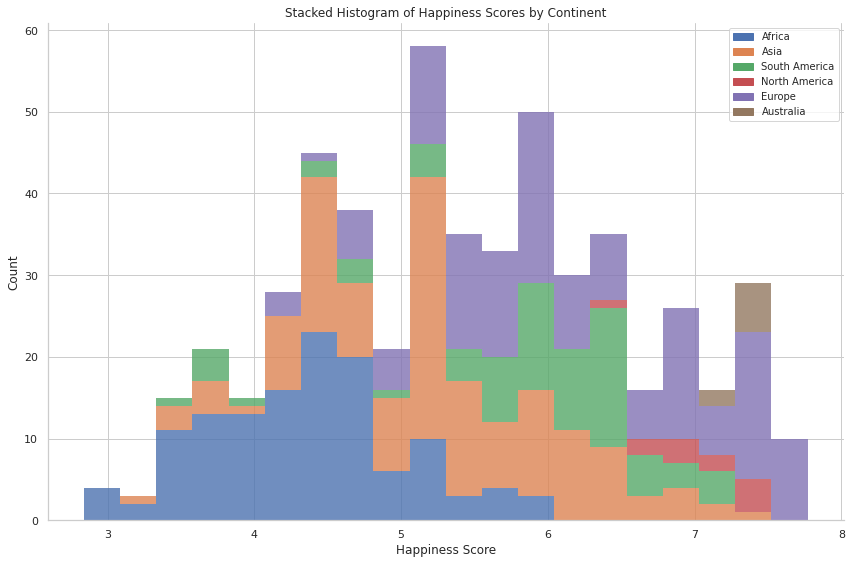

In [5]:

continent_scores = defaultdict(list)

with open('full_data.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        continent = row['continent']
        country = row['Country']
        year = row['Year']
        happiness_score = float(row['happiness_score'])
        continent_scores[continent].append((country, year, happiness_score))


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))


palette = sns.color_palette("deep", len(continent_scores))


country_heights = []

for continent, scores in continent_scores.items():
    heights = [score for _, _, score in scores]
    country_heights.append(heights)


bars = plt.hist(country_heights, bins=20, stacked=True, label=list(continent_scores.keys()), color=palette, alpha=0.8, linewidth=0)


legend_patches = [mpatches.Patch(color=palette[i], label=continent) for i, continent in enumerate(continent_scores.keys())]
plt.legend(handles=legend_patches, loc='upper right', fontsize='small')


fig = plt.gcf()
ax = plt.gca()

def hover(event):
    for container in bars:
        for rect in container:
            cont, ind = rect.contains(event)
            if cont:
                heights = [height.get_height() for height in container]
                countries = [country for country in continent_scores.keys()]
                bins = bars[1]
                bin_width = np.diff(bins)[0]
                index = ind["ind"][0]
                x = bars[1][index] + bin_width / 2
                y = heights[index]
                plt.annotate(f"{countries[index]}: {y:.2f}", xy=(x, y), xytext=(x, y + 0.2),
                             ha='center', va='bottom', color='black', alpha=0.7,
                             arrowprops=dict(arrowstyle='-', lw=0.5, color='black'))
                fig.canvas.draw_idle()

plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.title("Stacked Histogram of Happiness Scores by Continent")
plt.tight_layout()
sns.despine()

plt.show()


> *Figure 3: Histogram showing happiness per continent*


### happiness score by continent
The graph above in figure 3 shows us the amount of countries that are within a certain rounded score of happiness, the happiness is rounded to the nearest integer. As we can see African countries are the lowest on the scale of happiness while western countries are near the top of the distribution. Interesting to note is that while South american countries are poorer and less developed compared to western or Asian countries, their happiness is above what would be expected of their demographic metrics. Further relations in the world happiness dataset need to be drawn to conclude what causes such happiness has outside of income or education. The factors for happiness in these countries will be analyzed later in this notebook to gain an insight into the true factors of happiness.

In [6]:
data_mean = pd.read_csv('mean_data.csv')

fig = go.Figure()

x1, x2, x3, x4 = data_mean['gdp_per_capita'], data_mean['Education_Index'], data_mean['health'], data_mean['freedom']
y = data_mean['happiness_score']
countries = data_mean['Country']
continents = data_mean['continent']

# Add traces for all four scatter plots
scatter_trace_1 = go.Scatter(
    x=x1,
    y=y,
    mode="markers",
    text=countries,
    hovertemplate="Country: %{text}<br>Happiness: %{y:.2f}<extra></extra>",
    name="GDP"
)
scatter_trace_2 = go.Scatter(
    x=x2,
    y=y,
    mode="markers",
    text=countries,
    hovertemplate="Country: %{text}<br>Happiness: %{y:.2f}<extra></extra>",
    name="Education"
)
scatter_trace_3 = go.Scatter(
    x=x3,
    y=y,
    mode="markers",
    text=countries,
    hovertemplate="Country: %{text}<br>Happiness: %{y:.2f}<extra></extra>",
    name="Health"
)
scatter_trace_4 = go.Scatter(
    x=x4,
    y=y,
    mode="markers",
    text=countries,
    hovertemplate="Country: %{text}<br>Happiness: %{y:.2f}<extra></extra>",
    name="Freedom"
)

fig.add_trace(scatter_trace_1)
fig.add_trace(scatter_trace_2)
fig.add_trace(scatter_trace_3)
fig.add_trace(scatter_trace_4)

# Calculate and add trend lines
trend_line_1 = sm.OLS(y, sm.add_constant(x1)).fit().predict(sm.add_constant(x1))
trend_line_2 = sm.OLS(y, sm.add_constant(x2)).fit().predict(sm.add_constant(x2))
trend_line_3 = sm.OLS(y, sm.add_constant(x3)).fit().predict(sm.add_constant(x3))
trend_line_4 = sm.OLS(y, sm.add_constant(x4)).fit().predict(sm.add_constant(x4))

# Add trend lines for all four scatter plots
trend_line_trace_1 = go.Scatter(
    x=x1,
    y=trend_line_1,
    mode="lines",
    name="Relationship between GDP per capita and Happiness Score"
)
trend_line_trace_2 = go.Scatter(
    x=x2,
    y=trend_line_2,
    mode="lines",
    name="Relationship between Education Index and Happiness Score"
)
trend_line_trace_3 = go.Scatter(
    x=x3,
    y=trend_line_3,
    mode="lines",
    name="Relationship between Health Index and Happiness Score"
)
trend_line_trace_4 = go.Scatter(
    x=x4,
    y=trend_line_4,
    mode="lines",
    name="Relationship between Freedom Index and Happiness Score"
)

fig.add_trace(trend_line_trace_1)
fig.add_trace(trend_line_trace_2)
fig.add_trace(trend_line_trace_3)
fig.add_trace(trend_line_trace_4)

# Define button options
buttons = [
    {'label': 'GDP', 'method': 'update', 'args': [{'visible': [True, False, False, False]}, {'title': 'GDP & Happiness'}]},
    {'label': 'Education', 'method': 'update', 'args': [{'visible': [False, True, False, False]}, {'title': 'Education & Happiness'}]},
    {'label': 'Health', 'method': 'update', 'args': [{'visible': [False, False, True, False]}, {'title': 'Health & Happiness'}]},
    {'label': 'Freedom', 'method': 'update', 'args': [{'visible': [False, False, False, True]}, {'title': 'Freedom & Happiness'}]}
]

# Create updatemenus
updatemenus = [{'buttons': buttons, 'direction': 'down', 'showactive': True}]

# Update layout with updatemenus
fig.update_layout(
    title_text="Select Variable in dropdown menu",
    height=900,
    updatemenus=updatemenus
)



> *Figure 4: Scatterplot showing the relations between different factors and happiness*

### Exploring the Relationship Between Happiness and Socioeconomic Factors

Figure 4 shows visualizations to explore the correlations between these factors and happiness. We took the mean for each country between the years 2015 till 2018 so each scatterplot is a visualisation between four years. The x-axis of each plot represents a specific socioeconomic factor (GDP per capita, education index, health index, and freedom index), while the y-axis represents the happiness score.  With the button in the top left corner you can change the graph and look at each factor separately. To provide further insights, we also added trendlines to the scatter plots. These trend lines were calculated using the Ordinary Least Squares (OLS) method from the Statsmodels library. The trendlines helped us identify the overall trend and direction of the relationship between these socioeconomic factors and happiness for each country.

By visualizing the data in this manner, we were abled to observe any potential patterns or associations between the socioeconomic factors and happiness. The scatter plots allowed us to compare the relationships across these different factors and gain a better understanding of how they contribute to the total happiness.

In conclusion, this data visualization project provided valuable insights into the complex interplay between happiness and socioeconomic factors, highlighting the importance of factors such as GDP per capita, education, health, and freedom in determining happiness levels on all the countries in a global scale.




In [7]:
continent_colors = {
    'Africa': '#AEFD8E',
    'Asia': '#FAA598',
    'Europe': '#E3C97F',
    'North America': '#B47FE3',
    'Australia': '#B2E4FA',
    'South America': '#E8EAC8'
}

avg_happiness = data.groupby(['continent', 'Year'])['happiness_score'].mean().reset_index()

# Create a grouped histogram using Plotly
fig = px.histogram(avg_happiness, x='Year', y='happiness_score', color='continent', barmode='group',
                   color_discrete_map=continent_colors)


fig.update_layout(
    title='Development of Average Happiness Score by Continent',
    xaxis_title='Year',
    yaxis_title='Average Happiness',
    font=dict(family='Arial', size=14),
    legend=dict(font=dict(family='Arial', size=12)),
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)


fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')


fig.update_traces(marker=dict(line=dict(width=0.5)))


fig.show()

avg_gni = data.groupby(['continent', 'Year'])['GNI_per_capita_PPP'].mean().reset_index()

# Create a grouped histogram using Plotly
fig = px.histogram(avg_gni, x='Year', y='GNI_per_capita_PPP', color='continent', barmode='group',
                   color_discrete_map=continent_colors)


fig.update_layout(
    title='Development of GNI per capita (PPP) by Continent',
    xaxis_title='Year',
    yaxis_title='Average contribution',
    font=dict(family='Arial', size=14),
    legend=dict(font=dict(family='Arial', size=12)),
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)


fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')


fig.update_traces(marker=dict(line=dict(width=0.5)))

fig.show()

> *Figure 5: Barplot showing the development in happiness and GNI*

### GNI per capita and happiness

The two histograms shown above in figure 5 show that more money does not necessarily relate to being happier. For both GNI per capita and happiness the top three continents are consistent, these being in order: Australia, North America and Europe. However, the order of the bottom three continents is not consistent, while asia is, on average, significantly 'richer' than than South America, their happiness levels are lower in every single year, showing that, at least for South Americans, money does not buy happiness. Furthermore, these histograms show that while GNI per capita varies from year to year, the happiness of continents stays very consistent throughout the years, which also proves that the monetary wealth of people does not have the greatest influence on people's happiness.

In [8]:
data = data.sort_values('Year', ascending=True)

# Create a scatter plot for all available years using Plotly, with two plots per row
fig = px.scatter(data, x='happiness_score', y='GNI_per_capita_PPP', color='continent',
                 color_discrete_map=continent_colors, hover_data=['Country'], animation_frame="Year", animation_group="Country", hover_name="Country",
           log_x=True,)

# Set the plot title and axis labels
fig.update_layout(
    title='Scatter Plot of GNI per Capita (PPP) vs Happiness by Year',
    xaxis_title='Happiness score',
    yaxis_title='GNI per Capita (PPP)',
    height=500,  
    width = 800,
    plot_bgcolor='rgb(240, 240, 240, 240)'
)

# Set the hover label format
fig.update_traces(hovertemplate='Country: %{customdata[0]}<br>Happines: %{x}<br>GNI per Capita (PPP): %{y}')

# Show the plot
fig.show()


> *Figure 6: interactive scatterplot showing the GNI and Happiness per year*

### GNI and happiness trend
While these scatterplots in figure 6 show that having a 'richer' population (measured with GNI_per_capita adjusted for PPP) is generally related with having a happier population. These scatterplots also show that countries with a poorer population can still have happier population. This is exemplified by the fact that a country like Mexico has a much poorer population than a country like Singapore (which has by far the richest population) while their happiness scores are pretty much equal to each other. Furthermore, these scatterplots show that most countries move stronger along the x-axis than along the y-axis, this means that countries can become happier or unhappier regardless of the economic wealth of their citizens. Kuwait, however shows the exact opposite side of this phenomenon, they show great growth in their GNI per capita while their happiness scores do not increase or decrease drastically.

In [9]:

data = pd.read_csv('full_data.csv')

columns = ['gdp_per_capita', 'family', 'health', 'freedom', 'generosity', 'government_trust', 'social_support']

main_source_happiness = data.groupby('Country')[columns].max()
maxhappy = main_source_happiness.idxmax(axis=1)

maxhappyy = pd.DataFrame({'Country': maxhappy.index, 'Max': maxhappy.values})

fig = px.choropleth(maxhappyy,
                    locations="Country",
                    color="Max",
                    hover_name="Country",
                    color_continuous_scale='Plasma',
                    labels={'Max': 'Max Score'},
                    featureidkey='properties.name',
                    projection='natural earth',
                    height=700,
                    locationmode = 'country names',
                    )

# Show the plot
fig.show()

> *Figure 7: Most important factor contributing to happiness per country*

### What makes people happy?

Figure 7 shown above gives a overview of the world map. The figure shows which factor contributes the most to the happiness of each country. What is prominent in this visualisation is that for most countries GDP per Capita is not the most important contributor to happiness, which defends perspective that money is not the most important factor for happiness. This figure also shows that family is the most important factor in African and East-Asian countries, where as in European and American countries social support or GDP per Capita are the biggest contributors

---

### Reflection

During this assignment, we engaged in a collaborative effort to analyze and visualize the data. Originally we were in a group of four but one guy didn’t show up or respond to any of our messages, so at the end we worked in a group of three. In the end we didn't have a problem with the missing person as we were perfectly able to do the group project with the three of us. We worked together to clean and transform the datasets, ensuring the accuracy and reliability of our visualizations. This process required attention to detail and problem-solving skills as we encountered challenges such as missing values and outliers. Using Pandas, we manipulated and reshaped the data to uncover insights. We experimented with different chart types, colors, and layouts to present our findings effectively. Through bar plots, line plots, 3d-scatter plots and much more, we showcased the relationship between happiness scores, GDP per capita and a lot of other correlated subjects.

During our exploration, we made intriguing observations and encountered unexpected patterns. We delved deeper into the data, conducting additional research to understand the factors contributing to these deviations. Incorporating contextual information, we provided a comprehensive interpretation of the data, enriching our visualizations. Working as a group allowed us to leverage each other's strengths and learn from one another. We collaborated on data preprocessing, visualization techniques, and interpretation, fostering our technical and analytical skills. We discovered the power of data storytelling and its ability to convey insights in a compelling manner.

This assignment was a valuable learning experience for our group. It deepened our understanding of data analysis and visualization while highlighting the importance of collaboration and teamwork. Moving forward, we will continue to refine our skills and explore new opportunities to apply data-driven approaches in solving real-world problems.


---

### work distribution

At the end we all had a good contribution to the final product, except for Martijn, he didn't show up or responed to any of our messages. Everybody wrote code for the visualisations and the corresponding data explanation. Mark did the figures ..., Joep did the figures ... and Jasper did the figures .... We also helped eachother finding solutions to problems we faced and couldn't solve them ourselves. We found ourselves in a good work environment and we learned a lot from eachother. 
